In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# Test task for Junior Data Science Engineer



You can find dataset here: [dataset for test task.](https://www.kaggle.com/uciml/adult-census-income)<br>
<blockquote>
The goal of the test project is to build binary classification model.<br>
There is no prefered algorithms for solution, you can choose anyone.<br>
In the best case you should build several models and compare scores.<br>
Programing language - python. </blockquote>


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker <br> 
(Data Mining and Visualization, Silicon Graphics).<br>
A set of reasonably clean records was extracted using the following conditions:<br>
((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).<br>
The prediction task is to determine whether a person makes over $50K a year.<br>

Description of fnlwgt (final weight)<br>
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian<br>
noninstitutional population of the US. <br>
These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls.<br>
These are:<br>

- A single cell estimate of the population 16+ for each state.

- Controls for Hispanic Origin by age and sex.

- Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times<br>
so that by the end we come back to all the controls we used.<br>
The term estimate refers to population totals derived from CPS by creating "weighted tallies"<br>
of any specified socio-economic characteristics of the population.<br>
People with similar demographic characteristics should have similar weights. <br>
There is one important caveat to remember about this statement.<br>
That is that since the CPS sample is actually a collection of 51 state samples, <br>
each with its own probability of selection, the statement only applies within state.<br>

Relevant papers
Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid",<br>
Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996. (PDF)


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# ignore warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## Read data

In [3]:
# read data
file = "adult.csv"
raw_df = pd.read_csv(file)
raw_df.head(13)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


<IPython.core.display.Javascript object>

Table contains the values "?"
they need to be filled as Nan values.

##  Data Cleaning
Encode '?' as NaN

In [4]:
raw_df[raw_df == "?"] = np.nan
raw_df.isnull().sum()  # Check for missing values

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

<IPython.core.display.Javascript object>

## Impute missing values with most common class

In [5]:
# for each column, get value counts in decreasing order and take the index (value) of most common class
df_most_common_imputed = raw_df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_most_common_imputed.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

<IPython.core.display.Javascript object>

## Analising columns values

In [6]:
dataset = df_most_common_imputed
print("Work class categories \n")
print(dataset["workclass"].unique())

Work class categories 

['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']


<IPython.core.display.Javascript object>

In [7]:
print("Education categories")
education_dataset = dataset[["education", "education.num"]]
education_dataset = education_dataset.drop_duplicates()

data = {
    "education": education_dataset["education"],
    "education.num": education_dataset["education.num"],
}

education_dataset = pd.DataFrame(data=data)
education_dataset["education"].astype("category")
education_dataset.index = education_dataset["education.num"]
print(education_dataset[["education"]].sort_values("education.num"))

Education categories
                  education
education.num              
1                 Preschool
2                   1st-4th
3                   5th-6th
4                   7th-8th
5                       9th
6                      10th
7                      11th
8                      12th
9                   HS-grad
10             Some-college
11                Assoc-voc
12               Assoc-acdm
13                Bachelors
14                  Masters
15              Prof-school
16                Doctorate


<IPython.core.display.Javascript object>

The columns 'education' and 'education.num' represent the same information. <br>
'education.num' is the respective label for an education level.

In [8]:
dataset = df_most_common_imputed
print("marital status")
print(dataset["marital.status"].unique())
print(" \n occupation")
print(dataset["occupation"].unique())
print(" \n relationship")
print(dataset["relationship"].unique())
print(" \n race")
print(dataset["race"].unique())
print(" \n native.country")
print(dataset["native.country"].unique())

marital status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
 
 occupation
['Prof-specialty' 'Exec-managerial' 'Machine-op-inspct' 'Other-service'
 'Adm-clerical' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners'
 'Sales' 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Armed-Forces'
 'Priv-house-serv']
 
 relationship
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
 
 race
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
 
 native.country
['United-States' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dominican-Republic' 'Haiti' 'El-Salvador' 'Hungary' 'Columbia'
 'Guatemala' 'Jamaica' 'Ecuador' 'France' 'Yugoslavia' 'Scotland'
 'Portugal' 'Laos' 'Thaila

<IPython.core.display.Javascript object>

## Exploratory data analysis

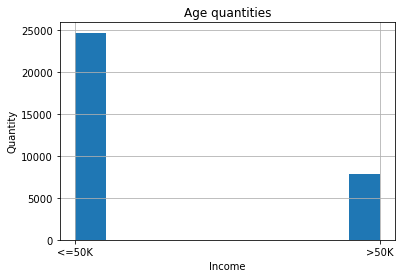

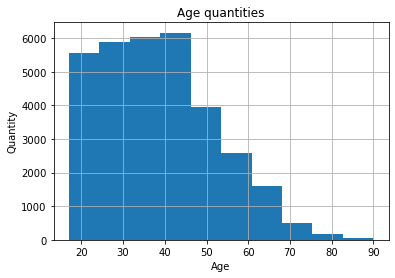

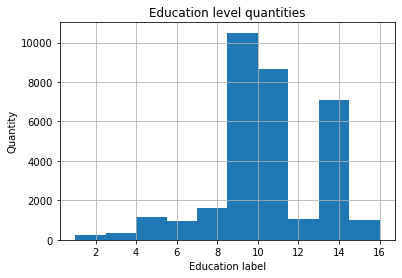

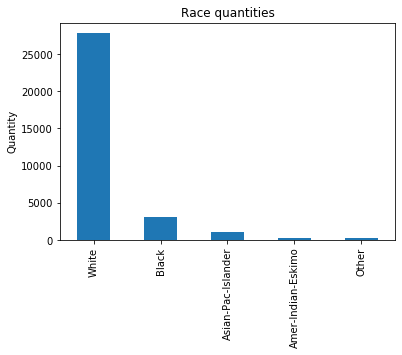

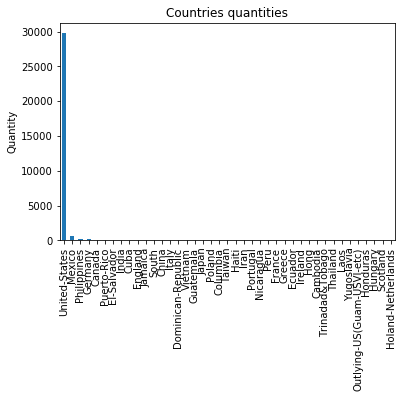

<IPython.core.display.Javascript object>

In [9]:
#Imbalanced Data
# Count of >50K & <=50K
ax = dataset['income'].hist()
ax.set_xlabel("Income")
ax.set_ylabel("Quantity")
plt.title("Age quantities")
plt.show()


ax = dataset["age"].hist()
ax.set_xlabel("Age")
ax.set_ylabel("Quantity")
plt.title("Age quantities")
plt.show()


ax = dataset["education.num"].hist()
ax.set_xlabel("Education label")
ax.set_ylabel("Quantity")
plt.title("Education level quantities")
plt.show()

ax = dataset["race"].value_counts().plot(kind="bar")
ax.set_ylabel("Quantity")
plt.title("Race quantities")
plt.show()

ax = dataset["native.country"].value_counts().plot(kind="bar")
ax.set_ylabel("Quantity")
plt.title("Countries quantities")
plt.show()




In [10]:
# Convert Sex value to Male": 1, "Female": 0
dataset["sex"] = dataset["sex"].map({"Male": 1, "Female": 0})

# Create Married Column - Binary Yes(1) or No(0)
dataset["marital.status"] = dataset["marital.status"].replace(
    ["Never-married", "Divorced", "Separated", "Widowed"], "Single"
)
dataset["marital.status"] = dataset["marital.status"].replace(
    ["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"], "Married"
)
dataset["marital.status"] = dataset["marital.status"].map({"Married": 1, "Single": 0})
dataset["marital.status"] = dataset["marital.status"].astype(int)

dataset["income"] = dataset["income"].map({"<=50K": 0, ">50K": 1})
# Drop data that would not like to use.
dataset.drop(
    labels=[
        "workclass",
        "education",
        "occupation",
        "relationship",
        "race",
        "native.country",
    ],
    axis=1,
    inplace=True,
)


print("Dataset with Dropped Labels")

dataset.head(10)

Dataset with Dropped Labels


,age,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,0,0,4356,40,0
1,82,132870,9,0,0,0,4356,18,0
2,66,186061,10,0,0,0,4356,40,0
3,54,140359,4,0,0,0,3900,40,0
4,41,264663,10,0,0,0,3900,40,0
5,34,216864,9,0,0,0,3770,45,0
6,38,150601,6,0,1,0,3770,40,0
7,74,88638,16,0,0,0,3683,20,1
8,68,422013,9,0,0,0,3683,40,0
9,41,70037,10,0,1,0,3004,60,1


<IPython.core.display.Javascript object>

# Fitting a model

In [11]:
# Preparing the features and target
X = dataset.drop("income", axis=1)
y = dataset.income


<IPython.core.display.Javascript object>

In [12]:
#  safe data (X, y) to local file X.pickle, y.pickle
# import pickle

# with open("X.pickle", "wb") as f:
#     pickle.dump(X, f)
# with open("y.pickle", "wb") as f:
#     pickle.dump(y, f)

<IPython.core.display.Javascript object>

## Split data into separate training and test set

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<IPython.core.display.Javascript object>

## Encode categorical variables

In [14]:
from sklearn import preprocessing

categorical = [
    "education.num",
    "marital.status",
    "sex",
]
for feature in categorical:
    le = preprocessing.LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature] = le.transform(X_test[feature])

<IPython.core.display.Javascript object>

## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
X_train.head()

,age,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week
0,0.177807,0.173244,-0.036491,1.051946,0.698654,-0.144749,-0.21852,0.851632
1,-0.993245,0.018238,1.130745,-0.950619,0.698654,-0.144749,-0.21852,-1.254868
2,-0.993245,-0.092370,-0.425570,-0.950619,-1.431324,-0.144749,-0.21852,-0.039580
3,1.056095,-0.631948,-0.425570,-0.950619,-1.431324,-0.144749,-0.21852,-0.039580
4,-1.066435,-0.639694,1.130745,-0.950619,-1.431324,-0.144749,-0.21852,-0.039580


<IPython.core.display.Javascript object>

# Training models

## Analising the % importance level in each feature

In [16]:
%%time
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
feature_importances = pd.DataFrame(
    importances * 100, index=X_train.columns, columns=["importance"]
).sort_values("importance", ascending=False)
display(feature_importances)


,importance
fnlwgt,28.046696
age,16.261687
marital.status,15.990657
education.num,13.589328
hours.per.week,10.526452
capital.gain,10.048654
capital.loss,3.531711
sex,2.004814


Wall time: 3.84 s


<IPython.core.display.Javascript object>

## Analisng the accuracy by increasing the number of K

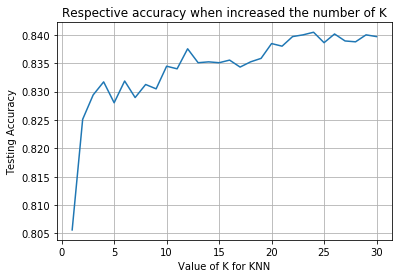

The best K value in this dataset is 23 - Accuracy = 0.8404729003531399
Wall time: 26.7 s


<IPython.core.display.Javascript object>

In [17]:
%%time

# instantiate learning model (k = 30)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
scores = []
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

sns.lineplot(range(1,31), scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title("Respective accuracy when increased the number of K")
plt.grid(True)
plt.show()
print(
    "The best K value in this dataset is {0} - Accuracy = {1}".format(
        scores.index(max(scores)), max(scores)
    )
)

In [20]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#Spot Check Algorithms 
models = []
models.append(('LR  ', LogisticRegression()))
models.append(('LDA ', LinearDiscriminantAnalysis()))
models.append(('KNN ', KNeighborsClassifier(n_neighbors=23)))
models.append(('CART',DecisionTreeClassifier(criterion='entropy')))
models.append(('NB  ', GaussianNB()))
models.append(('RF  ', RandomForestClassifier(n_estimators=250,
                                            max_features=3,
                                            max_depth=3,
                                            random_state=0)))
models.append(('GBC', GradientBoostingClassifier( n_estimators=250, max_depth=4)))
models.append(('XGB',XGBClassifier()))
# evalutate each model in turn
results = []
names = []
print('| Model | Accuracy | ')
for name, model in models:
    kfold = KFold(n_splits=30, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "  {0}:   {1:.3f} ".format(name, cv_results.mean())
    
    print(msg)


| Model | Accuracy | 
  LR  :   0.841 
  LDA :   0.831 
  KNN :   0.842 
  CART:   0.810 
  NB  :   0.799 
  RF  :   0.843 
  GBC:   0.865 
  XGB:   0.859 
Wall time: 3min 37s


<IPython.core.display.Javascript object>

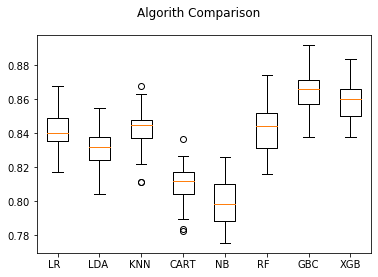

<IPython.core.display.Javascript object>

In [21]:
fig = plt.figure()
fig.suptitle("Algorith Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()